In [1]:
import pandas as pd
import numpy as np
import datetime
import glob
import plotly
import dash
from matplotlib import pyplot as plt

In [47]:
start="2009-10-14"

In [98]:
libor=pd.read_csv("LIBOR USD.csv")
libor["Date"]=libor["Date"].map(lambda x:pd.to_datetime(x,format='%d.%m.%Y'))
libor["Week"]=libor["Date"].map(lambda x:x.to_period("W"))
libor=libor.sort_values("Date")
libor=libor[libor["Date"]>start]
libor=libor.groupby("Week")["ON","1W","1M","2M","3M","6M","12M"].mean()
libor=libor.reset_index()

In [126]:
path_trea =r'./Treasury' 
allFiles_trea = glob.glob(path_trea + "/*.csv")
frame_trea = pd.DataFrame()
list_trea = []
for file_trea in allFiles_trea:
    df_trea = pd.read_csv(file_trea,index_col="Date", header=0)
    list_trea.append(df_trea)
frame_trea=pd.concat(list_trea)

frame_trea.index=frame_trea.index.map(lambda x:pd.to_datetime(x,format='%m/%d/%Y'))
frame_trea["Week"]=frame_trea.index.map(lambda x:x.to_period("W"))
frame_trea=frame_trea[frame_trea.index>start]
frame_trea=frame_trea.groupby("Week")["1 Mo","6 Mo","1 Yr","5 Yr","10 Yr","20 Yr","30 Yr"].mean()
frame_trea=frame_trea.reset_index()

In [144]:
hud=pd.read_csv("RM-A_09-30-2019.csv")
hud["DATE"]=hud["INITIAL ENDORSEMENT DATE"].map(lambda x:pd.to_datetime(x,format='%m/%d/%Y'))
hud["Week"]=hud["DATE"].map(lambda x:x.to_period("W"))
hud=hud[hud["DATE"]>start].reset_index()
hud["PROPERTY CITY"]=hud["PROPERTY CITY"].map(lambda x:x.upper())
hud=hud.sort_values("PROPERTY CITY")

In [146]:
hud=hud.groupby(["PROPERTY CITY","Week"])["INTEREST RATE"].mean()
hud=hud.reset_index(["PROPERTY CITY","Week"])

In [147]:
cities=["BOSTON", "PHILADELPHIA", "NEW YORK", "WASHINGTON", "CHICAGO", "LOS ANGELES", "ATLANTA"]

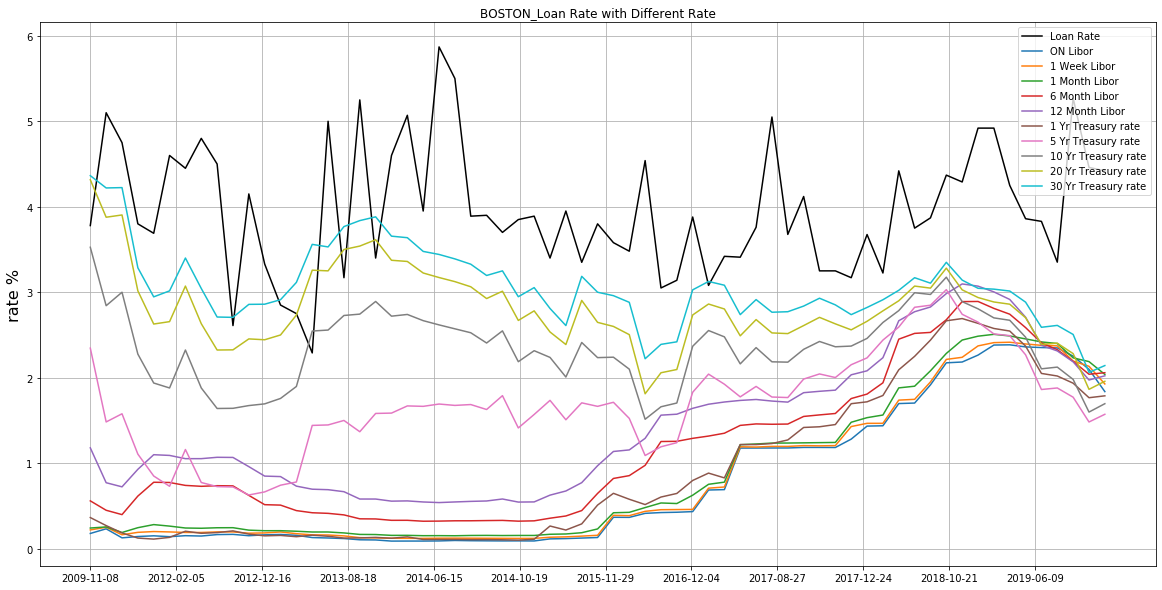

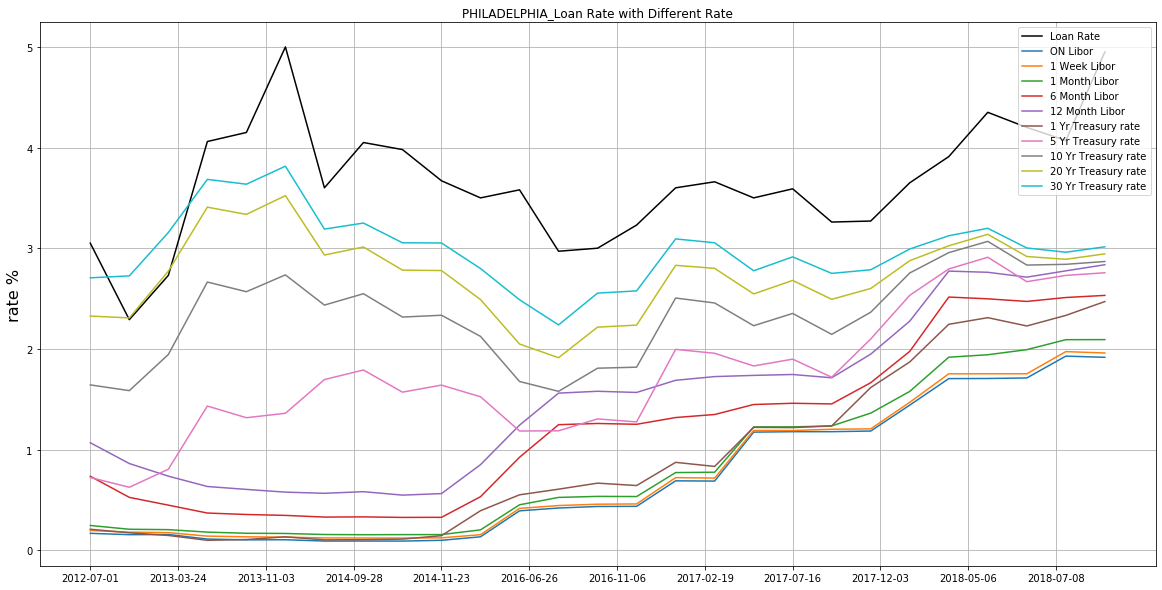

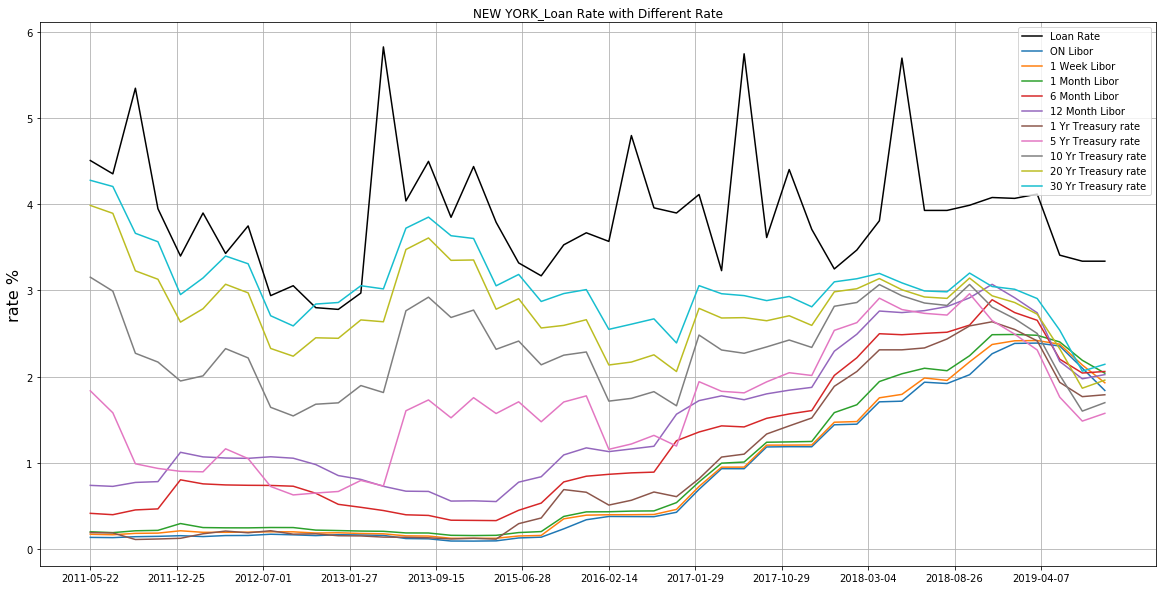

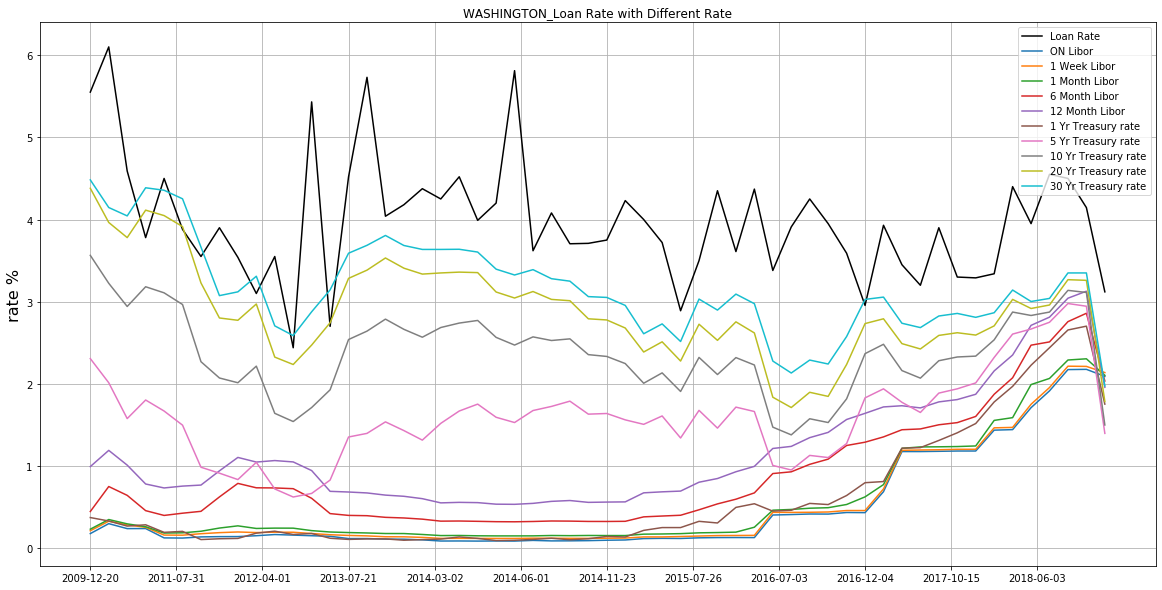

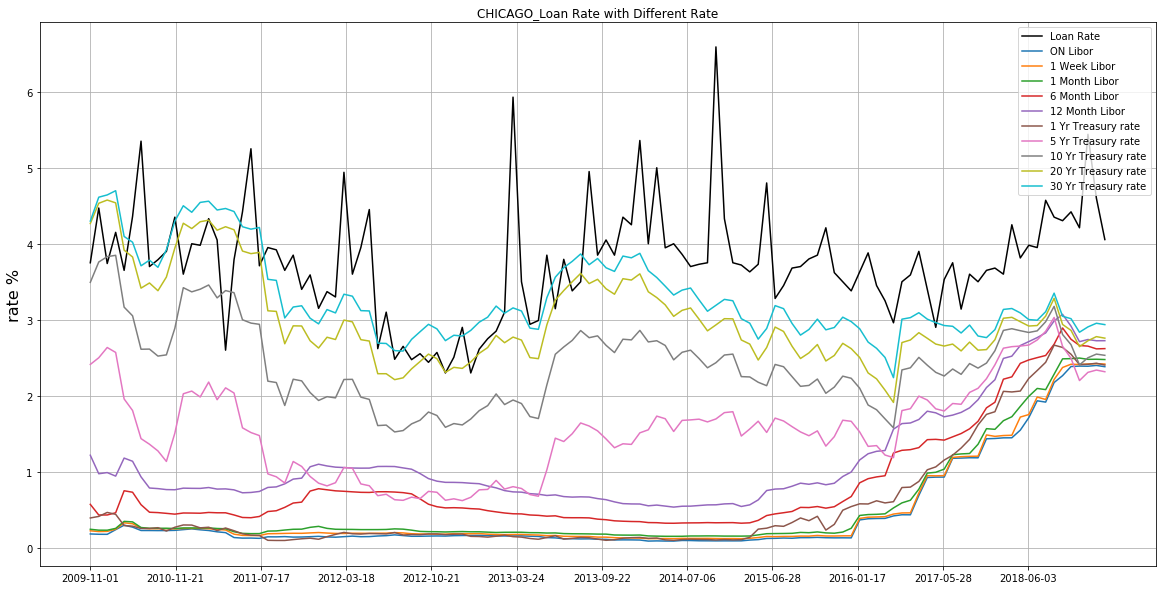

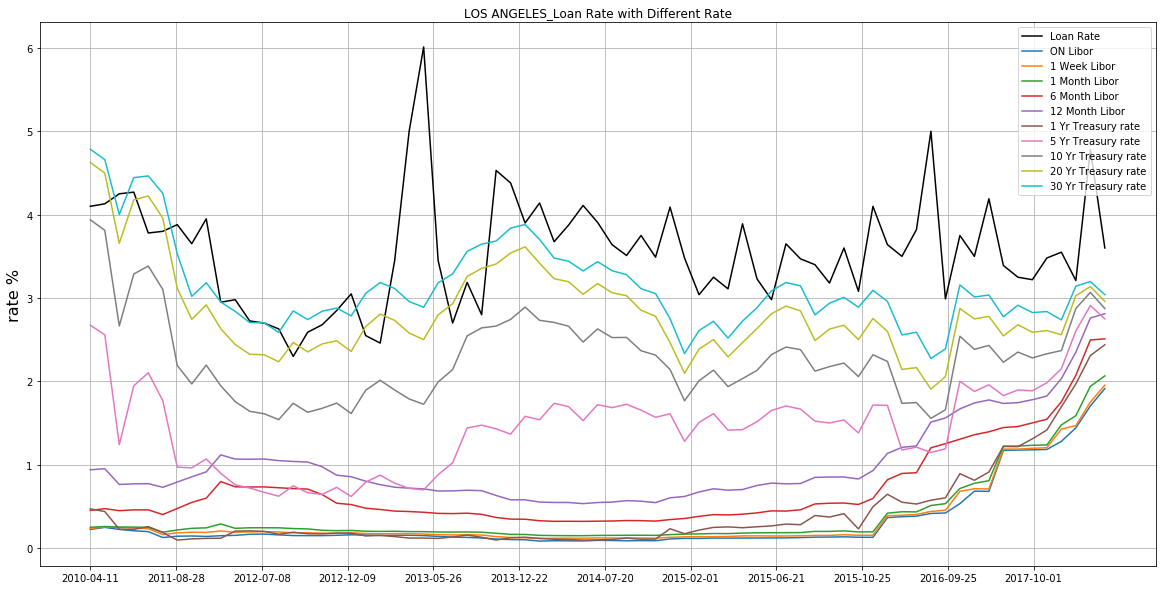

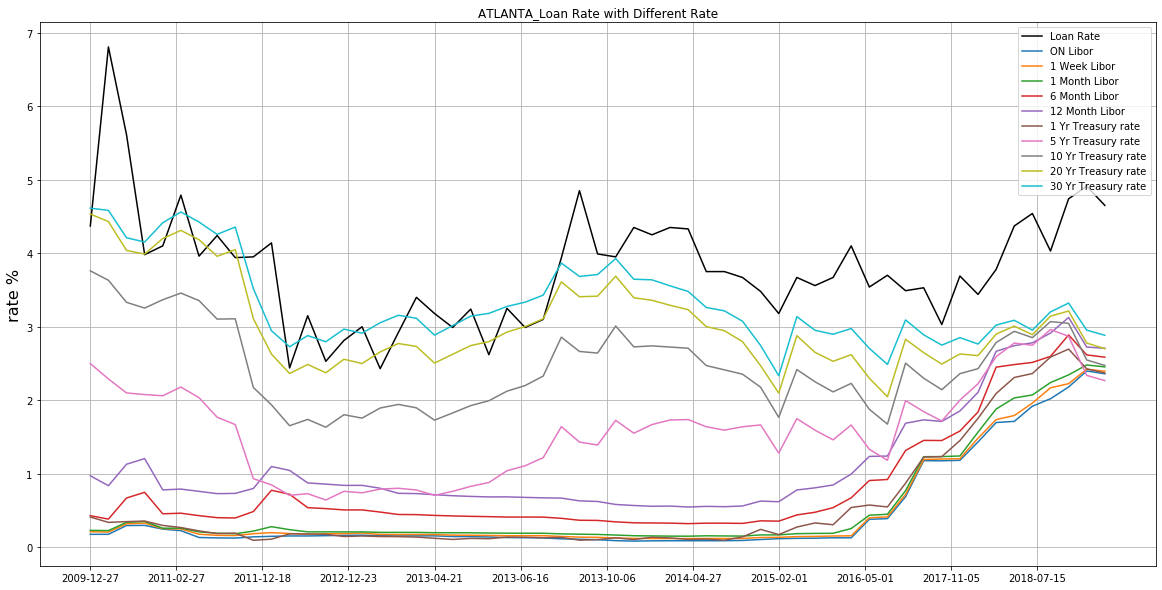

In [37]:
for i in range(len(cities)):
    sub=hud[hud["PROPERTY CITY"]==cities[i]]
    if (len(sub))>=20:
        x=sub["Week"].map(lambda x:str.split(x,"/")[-1])
        plt.figure(figsize=(20,10))
        plt.grid(dash)
        plt.plot(x, sub["INTEREST RATE"], label="Loan Rate",color="black")
        plt.plot(x , sub["ON"],label="ON Libor")
        plt.plot(x , sub["1W"],label="1 Week Libor")
        plt.plot(x , sub["1M"],label="1 Month Libor")
        plt.plot(x , sub["6M"],label="6 Month Libor")
        plt.plot(x, sub["12M"], label="12 Month Libor")
        plt.plot(x , sub["1 Yr"],label="1 Yr Treasury rate")
        plt.plot(x , sub["5 Yr"],label="5 Yr Treasury rate")
        plt.plot(x , sub["10 Yr"],label="10 Yr Treasury rate")
        plt.plot(x , sub["20 Yr"],label="20 Yr Treasury rate")
        plt.plot(x, sub["30 Yr"], label="30 Yr Treasury rate")
        plt.ylabel('rate %',fontsize = 16)
        plt.title(cities[i]+"_Loan Rate with Different Rate")
        plt.xticks(np.arange(len(sub), step=len(sub)/12))
        plt.legend(loc="upper right")
        plt.savefig(cities[i]+'_Loan Rate with Different Rate.jpg')

In [138]:
hud["Week"]

0        2017-07-24/2017-07-30
1        2017-12-11/2017-12-17
2        2013-03-11/2013-03-17
3        2013-08-26/2013-09-01
4        2013-02-25/2013-03-03
                 ...          
11795    2019-02-18/2019-02-24
11796    2017-05-08/2017-05-14
11797    2017-05-08/2017-05-14
11798    2017-07-31/2017-08-06
11799    2017-07-17/2017-07-23
Name: Week, Length: 11800, dtype: object

In [173]:
df=libor.merge(frame_trea)
df=df.reset_index()
for i in range(len(cities)):
    sub=hud[hud["PROPERTY CITY"]==cities[i]].reset_index()
    df=df.merge(sub[["INTEREST RATE","Week"]],on="Week",how="left")
    df=df.rename(columns={"INTEREST RATE":cities[i]})

In [176]:
df=df.reset_index(drop=True)

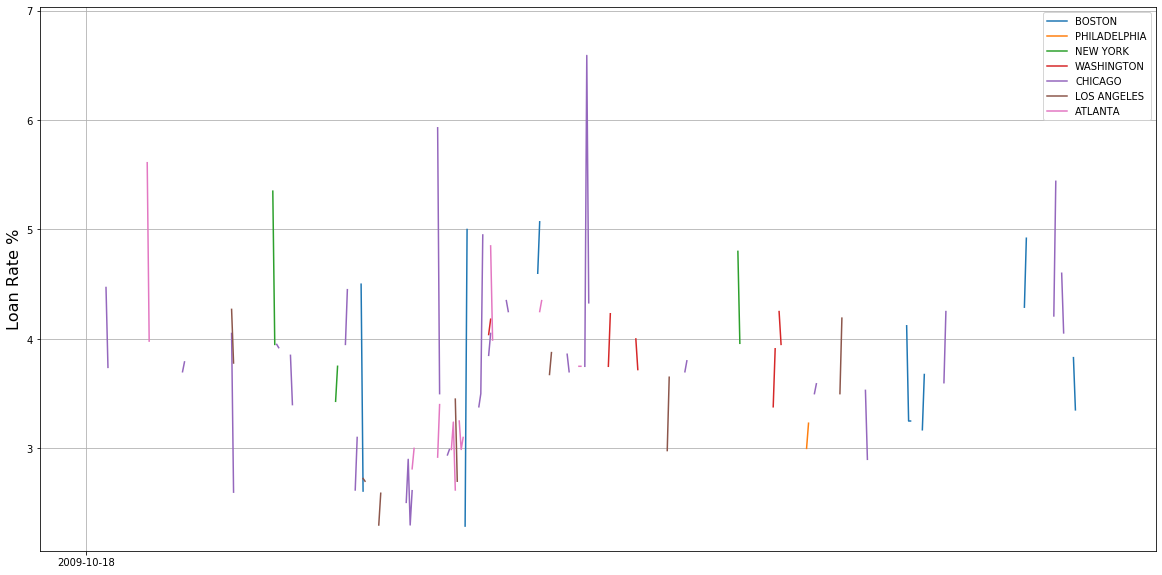

In [192]:
x=df["Week"].map(lambda x:str.split(str(x),"/")[-1])
plt.figure(figsize=(20,10))
plt.grid(dash)
plt.ylabel('Loan Rate %',fontsize = 16)
plt.xticks(np.arange(len(hud), step=len(hud)/12))
for i in range(len(cities)):  
    sub=df.loc[:, [cities[i]]]
    plt.plot(x,sub,label=cities[i])
plt.legend(loc="upper right")
plt.savefig(" Selected Cities Loan Rate Comparison.jpg")